In [3]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [4]:
csvpath = Path("BAC.csv")

In [6]:
# Define a variable "BAC_df" and store the BAC.csv into Pandas DataFrame using the BAC_path
bac_df = pd.read_csv(csvpath, infer_datetime_format=True)
bac_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
1,2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2,2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
3,2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
4,2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700


In [7]:
# Use the `count` function to count the number of non-null rows for each column
bac_df.count()

Date         251
Open         251
High         251
Low          251
Close        251
Adj Close    251
Volume       251
dtype: int64

In [8]:
# Define two variables labeled "earliest_date" and "latest_date"
# Set them equal to the earliest/lastest of Date in bac_df
earliest_date = bac_df["Date"].min()
latest_date = bac_df["Date"].max()

# print the earliest and latest dates
print(earliest_date)
print(latest_date)


2017-01-03
2017-12-29


In [9]:
# Use the `set_index` function to set the `Date` as the index to the DataFrame
bac_df.set_index('Date', inplace=True)

In [10]:
# After setting the `Date` as the index, loc can be used to specify a range of dates
six_month_filtered_df = bac_df.loc['2017-01-03':'2017-06-03', :]
six_month_filtered_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700
...,...,...,...,...,...,...
2017-05-26,23.230000,23.420000,23.170000,23.240000,22.769428,50399500
2017-05-30,23.129999,23.209999,22.879999,22.910000,22.446112,61307900
2017-05-31,22.780001,22.799999,22.090000,22.410000,22.028347,138636300


In [11]:
# Drop the extra columns (Close is dropped because there is an Adj Close column)
six_month_closing_prices_df = six_month_filtered_df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
six_month_closing_prices_df.head()

,Adj Close
Date,
2017-01-03,22.006727
2017-01-04,22.416971
2017-01-05,22.153240
2017-01-06,22.153240
2017-01-09,22.026258


In [12]:
# Use the `pct_change` function to calculate the daily returns over the date range of closing BAC prices
six_month_daily_returns = six_month_closing_prices_df.pct_change()
six_month_daily_returns

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,0.018642
2017-01-05,-0.011765
2017-01-06,0.000000
2017-01-09,-0.005732
...,...
2017-05-26,-0.000430
2017-05-30,-0.014200
2017-05-31,-0.018612


<AxesSubplot:xlabel='Date'>

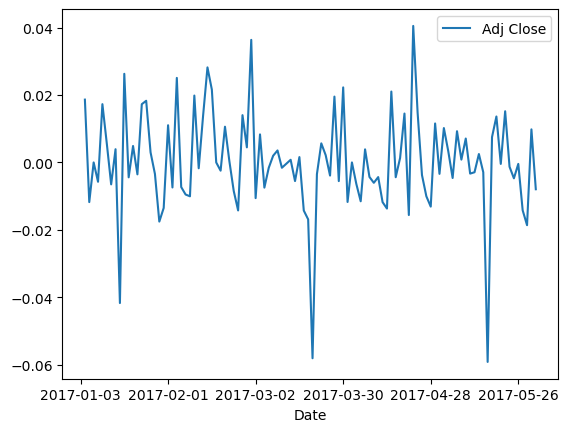

In [13]:
# Use the `plot` function to visualize the daily returns over the 6 month period for BAC
six_month_daily_returns.plot()

In [16]:
six_month_daily_returns7 = six_month_daily_returns.rolling(window = 7).mean()
six_month_daily_returns30 = six_month_daily_returns.rolling(window = 30).mean()
six_month_daily_returns90 = six_month_daily_returns.rolling(window = 90).mean()

In [17]:
six_month_daily_returnsstd7 = six_month_daily_returns.rolling(window = 7).std()
six_month_daily_returnsstd30 = six_month_daily_returns.rolling(window = 30).std()
six_month_daily_returnsstd90 = six_month_daily_returns.rolling(window = 90).std()

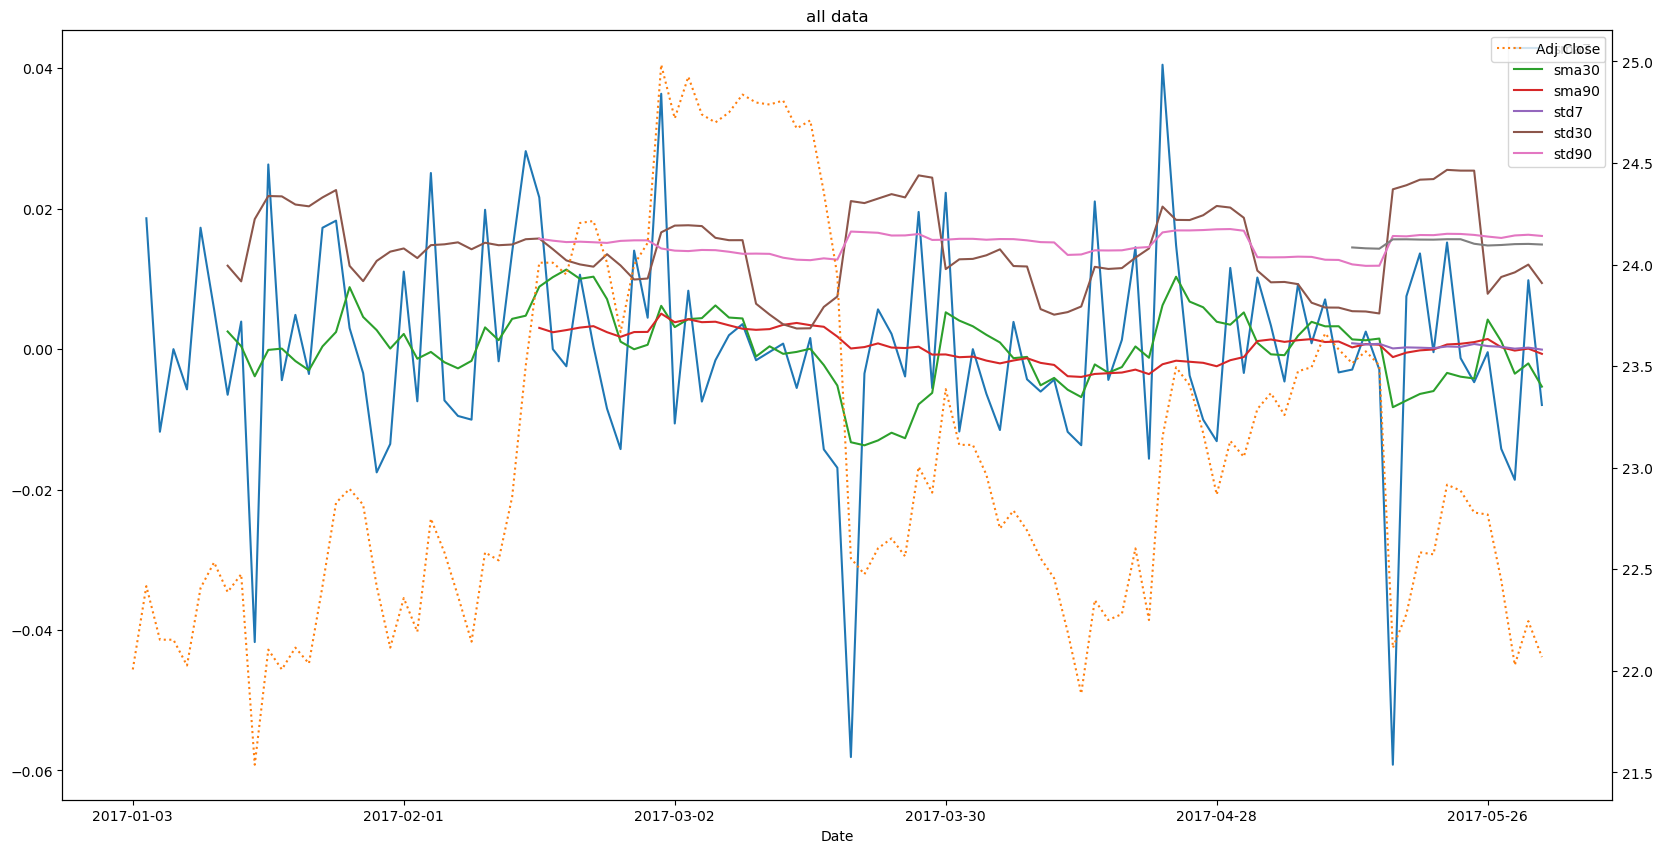

In [25]:
ax = six_month_daily_returns.plot(figsize=(20, 10), title="all data")
ax2 = six_month_closing_prices_df["Adj Close"].plot(secondary_y=True, linestyle="dotted")

six_month_daily_returns7.plot(ax = ax)
six_month_daily_returns30.plot(ax = ax)
six_month_daily_returns90.plot(ax = ax)
six_month_daily_returnsstd7.plot(ax = ax)
six_month_daily_returnsstd30.plot(ax = ax)
six_month_daily_returnsstd90.plot(ax = ax)

ax.legend(["sma7", "sma30", "sma90", "std7", "std30", "std90"])
ax2.legend(["Adj Close"])